-0.6991496276016026
0.846969680560282
Niestacjonarny
---------------
-19.094158719208274
0.0
Liczba lagów użytych: 0
Liczba obserwacji: 399
Wartości krytyczne: {'1%': np.float64(-3.446845912589748), '5%': np.float64(-2.8688110853002007), '10%': np.float64(-2.5706432834592747)}
Kryterium informacyjne: 1141.9132628660132
Stacjonarny


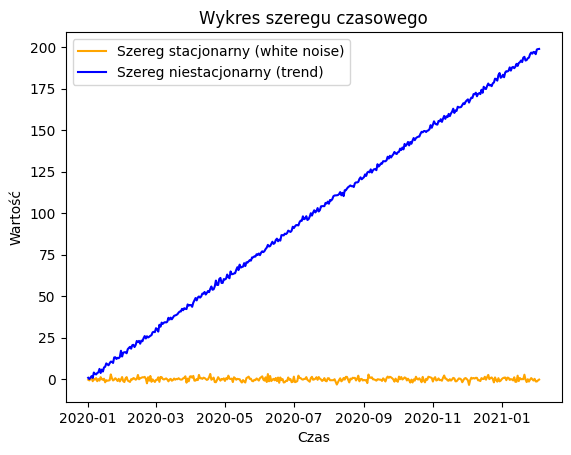

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data_1 = pd.DataFrame({"time": pd.date_range(start='1/1/2020', periods=400), "value": [0.5*i+np.random.normal() for i in range(400)]})

d1 = adfuller(data_1["value"])
print(d1[0])  # Test statistic - statystyka testowa (t-statystyka dla γ)
print(d1[1])  # p-value - prawdopodobieństwo uzyskania takiej lub bardziej ekstremalnej wartości
print("Stacjonarny" if d1[1] < 0.05 else "Niestacjonarny")

# PEŁNY WYNIK TESTU ADF ZAWIERA:
# d1[0] - Test statistic: statystyka testowa (im bardziej ujemna, tym silniejsza evidence przeciwko pierwiastkowi jednostkowemu)
# d1[1] - p-value: prawdopodobieństwo błędu I rodzaju (jeśli < 0.05, odrzucamy H0 - szereg stacjonarny)
# d1[2] - Number of lags used: liczba opóźnień użytych w teście (wybierane automatycznie)
# d1[3] - Number of observations used: liczba obserwacji użytych w regresji
# d1[4] - Critical values dict: słownik wartości krytycznych dla poziomów 1%, 5%, 10%
# n.p.
#{
#    '1%': -3.436,   # poziom istotności 1% (bardzo restrykcyjny)
#    '5%': -2.864,   # poziom istotności 5% (standardowy)
#    '10%': -2.568   # poziom istotności 10% (mniej restrykcyjny)
#}
# d1[5] - Maximize information criterion: kryterium informacyjne użyte do wyboru liczby lagów

# Jeśli p-value jest mniejsze niż 0.05, odrzucamy hipotezę zerową o istnieniu jednostkowego pierwiastka (szereg jest stacjonarny)
# W przeciwnym razie, nie mamy podstaw do odrzucenia hipotezy zerowej (szereg jest niestacjonarny)
# Nasz szereg jest:

print("---------------")

data_2 = pd.DataFrame({"time": pd.date_range(start='1/1/2020', periods=400), "value": [1*np.random.normal() for i in range(400)]})
d2 = adfuller(data_2["value"])
print(d2[0])  # Test statistic dla data_2
print(d2[1])  # p-value dla data_2

# DODATKOWE PARAMETRY MOŻNA WYŚWIETLIĆ:
print(f"Liczba lagów użytych: {d2[2]}")
print(f"Liczba obserwacji: {d2[3]}")
print(f"Wartości krytyczne: {d2[4]}")
print(f"Kryterium informacyjne: {d2[5]}")

# Jeśli p-value jest mniejsze niż 0.05, odrzucamy hipotezę zerową o istnieniu jednostkowego pierwiastka (szereg jest stacjonarny)
# W przeciwnym razie, nie mamy podstaw do odrzucenia hipotezy zerowej (szereg jest niestacjonarny)
# Nasz szereg jest:

print("Stacjonarny" if d2[1] < 0.05 else "Niestacjonarny")

plt.plot(data_2["time"], data_2["value"], color='orange')
plt.plot(data_1["time"], data_1["value"], color='blue')
plt.title("Wykres szeregu czasowego")
plt.legend(["Szereg stacjonarny (white noise)", "Szereg niestacjonarny (trend)"])
plt.xlabel("Czas")
plt.ylabel("Wartość")
plt.show()

# Innymi słowy stacjonarny to taki który ma:
# - stałą średnią
# - stałą wariancję (wariancja nie zmienia się w czasie)
# - stałą autokorelację (kowariancja zależy tylko od lagów, a nie od czasu) – czyli np. między poniedziałkiem a wtorkiem jest taka sama jak między wtorkiem a środą, itd. Korelacja między poniedziałkiem a wtorkiem w styczniu jest taka sama jak między poniedziałkiem a wtorkiem w lutym itd.